# Unit 7 | Assignment - Distinguishing Sentiments

## Background

**Twitter** has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose **one** of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

![output_10_0.png](Images/output_10_0.png)

![output_13_1.png](Images/output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* Include a written description of three observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.



In [183]:
%matplotlib inline
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [184]:
# Function get the tweets for specified handle and return list of 100 latest tweets

def get_tweets(target_user):
    
    # Counter
    counter = 1

    # Variables for holding sentiments
    sentiments = []

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            # print("Tweet {counter}: {tweet["text"]})

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Source Account": target_user,
                               "Tweet Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1
    
    return sentiments


In [185]:
def append_tweet_df(sentiments_pd, all_sentiments_pd):
    all_sentiments_pd = all_sentiments_pd.append(sentiments_pd)
    return all_sentiments_pd

In [186]:
# build the target user list
target_user_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

all_sentiments_pd = pd.DataFrame([])

# Get tweets from each item on the list and add to data frame of all tweets
for target_user in target_user_list:
    sentiments_pd = pd.DataFrame.from_dict(get_tweets(target_user))
    all_sentiments_pd = append_tweet_df(sentiments_pd, all_sentiments_pd)
    
all_sentiments_pd


,Compound,Date,Negative,Neutral,Positive,Source Account,Tweet Text,Tweets Ago
0,0.0000,Tue Oct 02 19:02:07 +0000 2018,1.000,0.000,0.000,@BBC,Discover the extraordinary story of how a smal...,1
1,-0.8020,Tue Oct 02 17:55:03 +0000 2018,0.573,0.427,0.000,@BBC,Knife crime is up 22%. Who are the victims and...,2
2,0.4019,Tue Oct 02 17:06:06 +0000 2018,0.803,0.000,0.197,@BBC,The gender reveal party that sparked a massive...,3
3,0.5574,Tue Oct 02 16:06:02 +0000 2018,0.816,0.000,0.184,@BBC,"In 2002, Iberian Lynx were the rarest cats in ...",4
4,-0.2732,Tue Oct 02 14:06:04 +0000 2018,0.554,0.242,0.204,@BBC,Two scientists who discovered how to fight can...,5
5,0.5994,Tue Oct 02 13:05:03 +0000 2018,0.795,0.000,0.205,@BBC,"🍲😋 A bowl of warm, hearty stew is always a wel...",6
6,0.0000,Tue Oct 02 12:05:04 +0000 2018,1.000,0.000,0.000,@BBC,Jodie Whittaker. New Doctor...and a 'Shat Lass...,7
7,0.5719,Tue Oct 02 10:47:27 +0000 2018,0.829,0.000,0.171,@BBC,Donna Strickland has become the first woman to...,8
8,0.0000,Tue Oct 02 10:27:17 +0000 2018,1.000,0.000,0.000,@BBC,RT @BBCSport: SPOTY is back - and there are so...,9
9,0.6696,Tue Oct 02 10:16:58 +0000 2018,0.728,0.000,0.272,@BBC,❤️💃🏻 Ballet is still the love of Joyce's life ...,10


In [187]:
# Export file as a CSV, without the Pandas index, but with the header
all_sentiments_pd.to_csv("NewsTweets.csv", index=True, header=True)

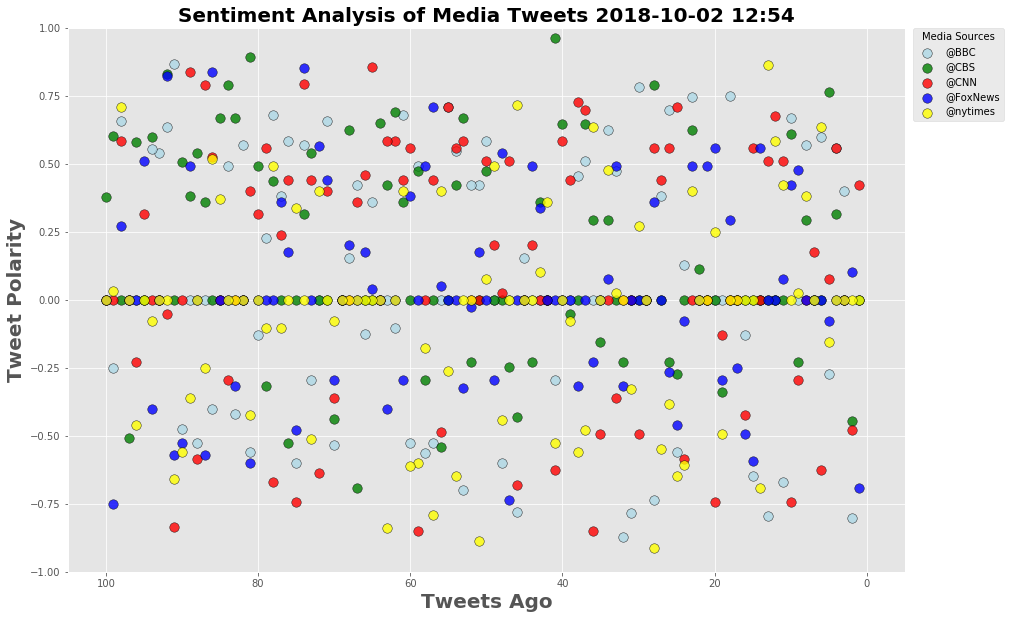

In [188]:
# Plot the scatter diagram

tweet_sources = all_sentiments_pd["Source Account"].unique()
colors = ["lightblue", "green", "red", "blue", "yellow"]

for i in range(len(tweet_sources)):
    x_axis = all_sentiments_pd[all_sentiments_pd["Source Account"] == tweet_sources[i]]["Tweets Ago"].values
    y_axis = all_sentiments_pd[all_sentiments_pd["Source Account"] == tweet_sources[i]]["Compound"].values
    
    plt.scatter(x_axis, y_axis, s = 90, c = colors[i], label = tweet_sources[i],
                alpha = .8, edgecolor = 'black', linewidth = .5)


now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.xlabel("Tweets Ago", fontsize=20, fontweight="bold")
plt.ylabel("Tweet Polarity", fontsize=20, fontweight="bold")
plt.title("Sentiment Analysis of Media Tweets " + now, fontsize=20, fontweight="bold")
plt.legend(title="Media Sources", bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.gcf().set_size_inches(15, 10)
plt.xlim(105, -5)
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Tweets.png")
plt.show()

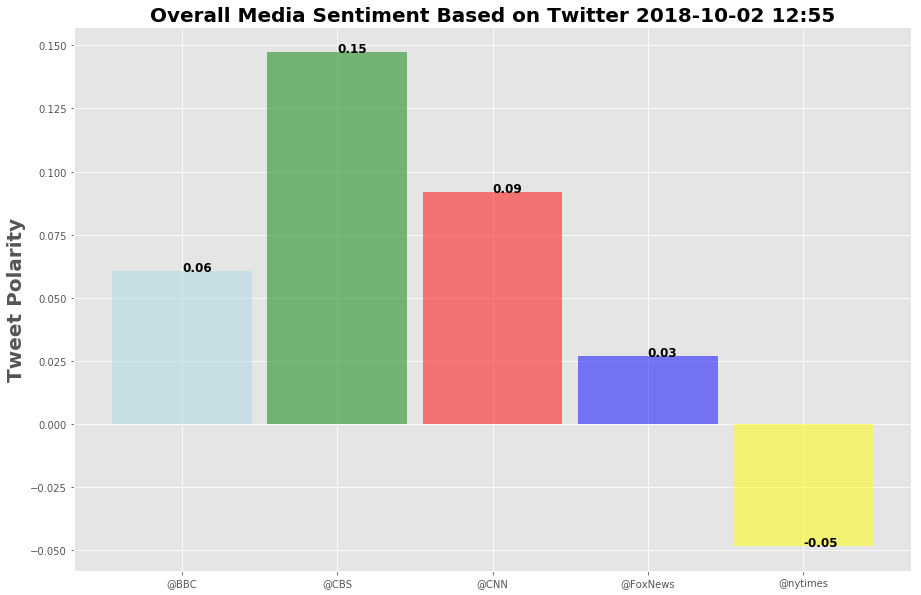

In [190]:
# plot Bar chart 

colors = ["lightblue", "green", "red", "blue", "yellow"]
plt.figure(figsize=(10, 7))
x_axis = target_user_list
y_axis = all_sentiments_pd.groupby(["Source Account"]).mean()["Compound"]

bar_graph = plt.bar(x_axis, y_axis, color = colors, alpha=0.5, align="center", width=0.9)

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.title("Overall Media Sentiment Based on Twitter " + now, fontsize=20, fontweight="bold")
plt.ylabel("Tweet Polarity", fontsize=20, fontweight="bold")
plt.grid(True)
plt.gcf().set_size_inches(15, 10)

# Add avg compound sentiment to eacg bar
for bar in bar_graph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, s=round(height, 2), size = 12, fontweight="bold")

plt.savefig("Sentiment_Analysis_Tweets.png")
plt.show()